## Customer segmentation based on credit card usage behavior

The dataset for this notebook consists of credit card usage behavior of customers with 18 behavioral features. Segmentation of customers can be used to define marketing strategies.


Step 1: Importing Libraries and Loading Data

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings(action="ignore")

ModuleNotFoundError: No module named 'numpy'

In [2]:
df=pd.read_csv("CC GENERAL.csv")
print(df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Data Dictionary for Credit Card dataset:

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Step 2: Dropping Irrelevant Columns

In [4]:
# Drop CUST_ID since it's not useful for clustering
df.drop("CUST_ID", axis=1, inplace=True)


Step 3: Handling Missing Values

In [5]:
# Checking for missing values
df.isnull().sum()


BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Filling missing values with median (we can use mean or median, but median is more robust)
df.fillna(df.median(numeric_only=True), inplace=True)
# Verifying all the columns are filled
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Step 4: Feature Scaling (Standardization)


In [7]:
# Scaling the data (Clustering algorithms like K-Means are sensitive to scale.)
# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Converting back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Printing the scaled DataFrame
print(df_scaled.head())


    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451      

**DELETE LATER (JUST FOR STUDY PURPOSES)**

Understanding **scaling** is key to working well with machine learning algorithms like clustering. Let’s go through everything clearly and simply:

---

## 🧮 What Is Scaling (Standardization)?

**Scaling** is the process of adjusting the values of numeric features to a common scale. This is important when different features are measured in different units or ranges.

### 🔍 For example:

* `BALANCE` might range from **0 to 50,000**
* `PURCHASES_FREQUENCY` ranges from **0 to 1**
* `CREDIT_LIMIT` could range from **1,000 to 20,000**

If we don't scale them, algorithms like **K-Means**, which use distance calculations (like Euclidean distance), will treat large numbers as more important — **even if they’re not!**

---

## 📏 What Does `StandardScaler` Do?

`StandardScaler` from `sklearn` performs **standardization**, which means:

$$
\text{z} = \frac{x - \mu}{\sigma}
$$

Where:

* $x$ = original value
* $\mu$ = mean of the feature
* $\sigma$ = standard deviation of the feature

### ✅ As a result:

* The **mean** of each feature becomes **0**
* The **standard deviation** becomes **1**
* Values get spread around 0, so you often see **negative numbers** if the original value was below the mean.

---

### ❓Why Do Values Become Negative?

Because **standardization centers the data around 0**. So:

* If a value is **below the mean**, the result will be **negative**
* If it’s **above the mean**, it will be **positive**
* The **unit is in standard deviations**

Example:
If a customer’s `PURCHASES` = 500 and the mean `PURCHASES` = 1000, then:

$$
z = \frac{500 - 1000}{500} = -1
$$

---

### 🔁 Why Do We Convert Back to a DataFrame?

After scaling, the result is a **NumPy array**, which:

* Has no column names
* Is harder to inspect or manipulate

So we convert it back to a DataFrame for:

* Easier **analysis**
* **Consistent** variable names
* Better compatibility with visualization tools like `seaborn` and `pandas.plot()`

---

### 🧠 Summary

| Step                 | Why It's Done                                             |
| -------------------- | --------------------------------------------------------- |
| Scaling              | Ensures all features contribute **equally** to clustering |
| Standardization      | Centers data (mean = 0, std = 1), handles outliers better |
| Negative values      | Appear when original values < mean                        |
| Convert to DataFrame | For readability, column names, and easier analysis        |



Choosing the Optimal Number of Clusters (k)

K-Means & Elbow Method

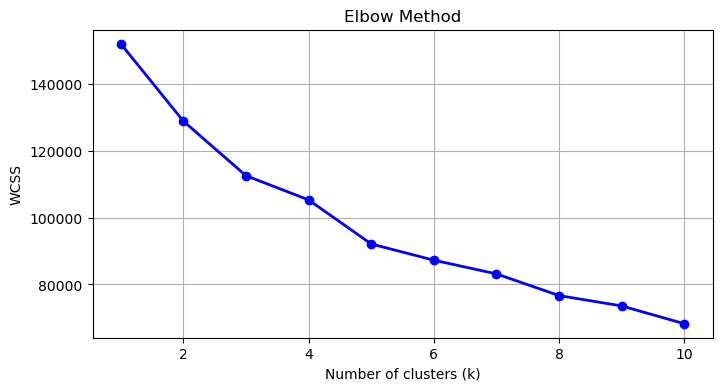

In [8]:
# We’ll use two popular methods:
# Elbow Method – based on how compact the clusters are
# Silhouette Score – based on how well-separated the clusters are
# K-Means & Elbow Method
# What It Measures: The within-cluster sum of squares (WCSS): how tightly the data points are grouped around their cluster centers.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, wcss, 'bo-', linewidth=2)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# What to Look For:
# A “bend” or “elbow” in the curve

# That’s the point where adding more clusters doesn’t significantly improve how well the model fits the data

Silhouette Score 

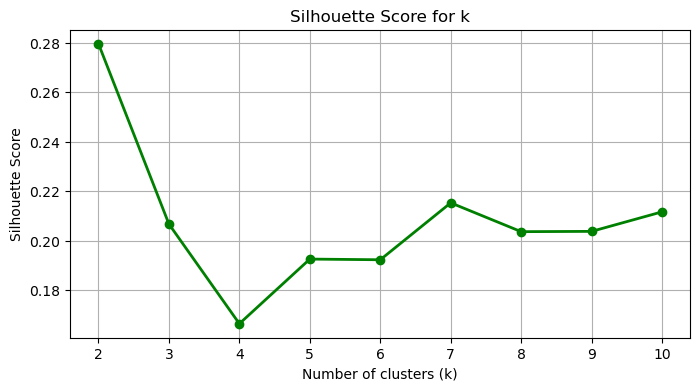

In [9]:
# Silhouette Score 
# What It Measures: How well each point fits within its cluster versus the next nearest cluster. Ranges from -1 to 1:

# ~1: well-separated

# ~0: overlapping clusters

# <0: wrong cluster

from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Silhouette is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'go-', linewidth=2)
plt.title('Silhouette Score for k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#What to Look For: Pick the k with the highest silhouette score. Often, this will match the elbow method, but not always.

**DELETE LATER (ONLY FOR STUDY PURPOSES)**


## 🔍 1. **Elbow Method Plot Interpretation**

### Key Observations:

* The **WCSS** (within-cluster sum of squares) decreases as the number of clusters increases — as expected.
* You’re looking for a **“bend” or “elbow”** in the curve — where the rate of decrease in WCSS slows down.

### ✅ Interpretation:

* The **strongest bend appears around k = 3 or 4**
* After k = 5, the improvements in WCSS become smaller and more gradual
* So the **elbow point** seems to be at **k = 3 or 4**

---

## 📊 2. **Silhouette Score Plot Interpretation**

### Key Observations:

* The **highest silhouette score** is at **k = 2** (\~0.28)
* Scores drop after k = 2, with a **small peak again at k = 7 and 10** (\~0.21)
* The silhouette scores overall are **not very high**, which may mean the clusters overlap or are noisy — not uncommon for real-world financial behavior data

### ✅ Interpretation:

* **k = 2** gives the most **compact and well-separated** clusters according to silhouette score
* But from the elbow method, **k = 3 or 4** gives better structure in terms of WCSS

---

## ✅ Recommendation

| Method           | Best k | Comments                                               |
| ---------------- | ------ | ------------------------------------------------------ |
| Elbow Method     | 3 or 4 | Good balance of tight clusters and diminishing returns |
| Silhouette Score | 2      | Most distinct clusters, but may be oversimplified      |

### 👉 Choose:

* Start with **k = 3**, as it’s a compromise between both methods:

  * Better structure than k = 2
  * Still relatively simple
* Later you can compare results with **k = 2** or **k = 4** to test robustness


Apply K-Means with k=3

 Step 1: Fitting the Model and Adding Labels

In [10]:
from sklearn.cluster import KMeans

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Add the cluster labels to the original (or scaled) DataFrame
df_clustered = df.copy()  # original with actual values
df_clustered['Cluster'] = kmeans.labels_

# Print the first few rows of the clustered DataFrame
print(df_clustered.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

Step 2: Examining Cluster Sizes

In [11]:
# How many customers in each cluster? This tells us if any one cluster dominates, 
# which might suggest imbalance or insights like “most users are average spenders.”
df_clustered['Cluster'].value_counts()


Cluster
1    4557
2    3149
0    1244
Name: count, dtype: int64

 Step 3: Visualizing the Clusters 

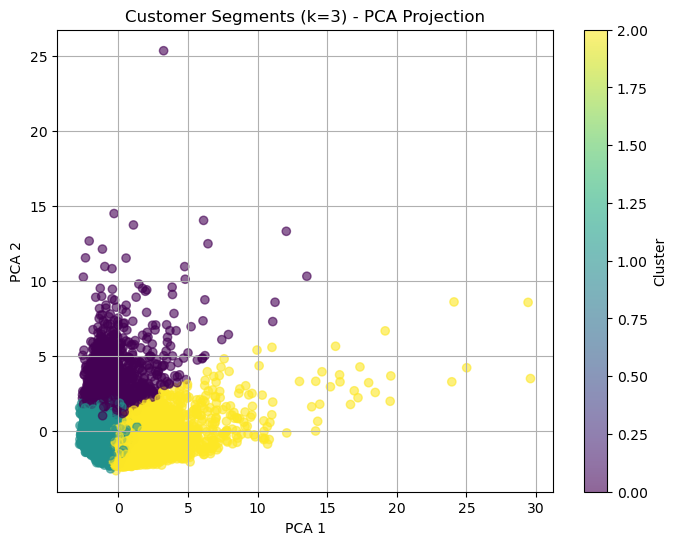

In [12]:
#Since the data has many dimensions, we’ll use PCA to reduce it to 2D for plotting:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a scatter plot with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], 
            c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.title('Customer Segments (k=3) - PCA Projection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


 Step 4: Interpreting the Clusters

In [13]:
# Let’s look at what makes each cluster unique by checking the mean values for each variable per cluster:
# Mean values per cluster
cluster_profiles = df_clustered.groupby('Cluster').mean(numeric_only=True)
cluster_profiles

# This shows us patterns like:
# Cluster 0 = high balance, low purchases
# Cluster 1 = frequent installment use
# Cluster 2 = low cash advance, full payments, etc.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,4540.779565,0.968558,577.328730,362.963055,214.447404,4506.324609,0.285389,0.136476,0.186641,0.482834,14.251608,8.360932,7458.283397,3581.201009,2090.945515,0.036505,11.389068
1,942.285779,0.789345,302.351964,207.644643,95.005866,529.766557,0.244828,0.091372,0.148201,0.103837,1.909151,3.987492,3221.344574,927.732113,539.410134,0.093149,11.396094
2,1289.083402,0.968448,2185.667964,1239.933881,946.122934,235.275466,0.926621,0.389279,0.747596,0.043096,0.840902,32.734519,5165.467248,2168.608505,794.756228,0.287665,11.743411


Analyzing the cluster profiles so we can interpret what kind of customers belong to each cluster.

Step 1: Calculating the Cluster Averages


In [14]:
# Computing the average values of all numeric features for each cluster

cluster_profiles = df_clustered.groupby('Cluster').mean(numeric_only=True)
cluster_profiles


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,4540.779565,0.968558,577.328730,362.963055,214.447404,4506.324609,0.285389,0.136476,0.186641,0.482834,14.251608,8.360932,7458.283397,3581.201009,2090.945515,0.036505,11.389068
1,942.285779,0.789345,302.351964,207.644643,95.005866,529.766557,0.244828,0.091372,0.148201,0.103837,1.909151,3.987492,3221.344574,927.732113,539.410134,0.093149,11.396094
2,1289.083402,0.968448,2185.667964,1239.933881,946.122934,235.275466,0.926621,0.389279,0.747596,0.043096,0.840902,32.734519,5165.467248,2168.608505,794.756228,0.287665,11.743411


Step 2: Interpreting Cluster Behavior


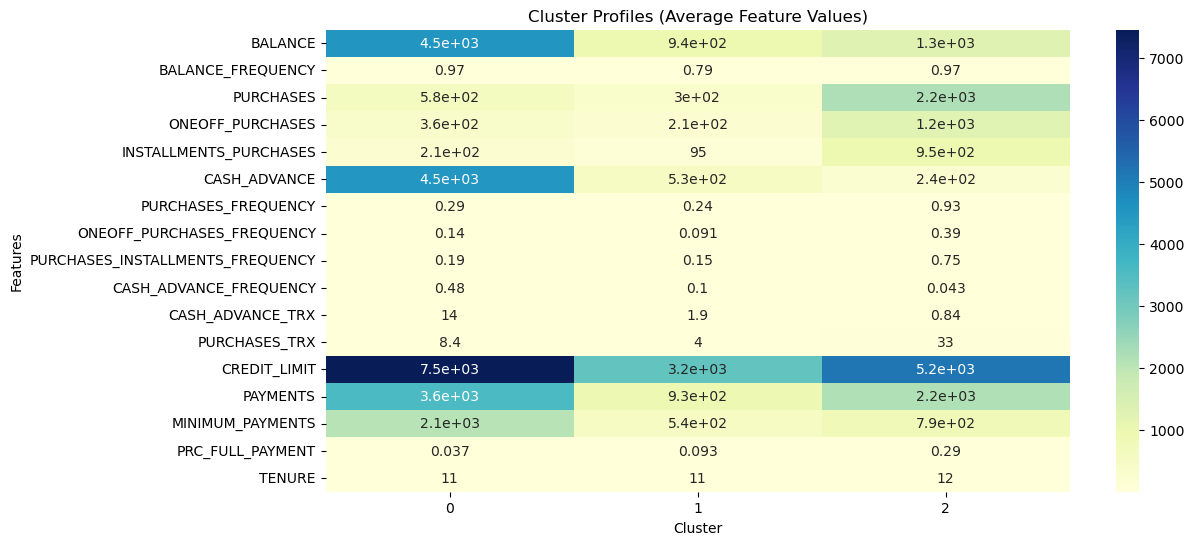

In [15]:
# **DELETE LATER (ONLY FOR STUDY PURPOSES)**
# Now look at what's high or low in each cluster. You're looking for patterns like:
# High PURCHASES, high BALANCE, high CREDIT_LIMIT → Possibly high spenders
# Low PURCHASES, low CASH_ADVANCE, short TENURE → Possibly new or inactive users
# High INSTALLMENTS_PURCHASES, low ONEOFF_PURCHASES → Possibly budget planners or installment buyers
# High PRCFULLPAYMENT → Likely financially responsible users
# You can even normalize or plot the profiles if it's hard to interpret raw averages.

#Visualizing Cluster Profiles with Radar/Bar Plot to make it easier to see differences:

import seaborn as sns
import matplotlib.pyplot as plt

# Transpose to make features the index
cluster_profiles_T = cluster_profiles.T

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profiles_T, annot=True, cmap='YlGnBu')
plt.title("Cluster Profiles (Average Feature Values)")
plt.ylabel("Features")
plt.xlabel("Cluster")
plt.show()


Describing Each Cluster


## 🔎 Summary of Cluster Averages

### **Cluster 0:**

* **High balance**: 4,540
* **High cash advance**: 4,506 (🔥)
* **Low purchase frequency**: 0.29
* **Very low full payments**: 3.6%
* **Credit limit**: 7,458
* **Tenure**: 11.4

**Interpretation**:
These customers **rely heavily on cash advances**, make **relatively few purchases**, and **rarely pay in full**. They have **high balances** and **credit limits**, but their financial behavior could indicate **cash flow problems** or **higher risk**.

🧭 **Label**:

> **"Heavy Cash Users / High-Risk Credit Users"**

---

### **Cluster 1:**

* **Low balance**: 942
* **Low cash advance**: 530
* **Low purchase amount**: 302
* **Few transactions**: 4 purchases, 2 cash advances
* **Lowest full payment ratio**: 9.3%
* **Credit limit**: 3,221

**Interpretation**:
These users are **low activity**, use their credit cards sparingly, and **do not engage in significant purchases or payments**. Possibly **new, inactive, or financially conservative** users.

🧭 **Label**:

> **"Low-Usage / Inactive Users"**

---

### **Cluster 2:**

* **Moderate balance**: 1,289
* **Very high purchases**: 2,185
* **High installment + one-off purchases**
* **Very frequent use**: 0.93 purchase frequency
* **Low cash advance usage**: 235
* **High full payment ratio**: 29%
* **High transactions**: 32

**Interpretation**:
These are **active and responsible card users**. They use their cards frequently for purchases (both one-off and installments) and make **high payments** and a **high share of full payments**.

🧭 **Label**:

> **"Engaged and Responsible Spenders"**

---

## 📊 Recap Table

| Cluster | Label                            | Key Traits                                                               |
| ------- | -------------------------------- | ------------------------------------------------------------------------ |
| 0       | Heavy Cash Users / High-Risk     | High cash advance, low payments, low purchase frequency                  |
| 1       | Low-Usage / Inactive Users       | Low everything – purchases, cash advance, credit limit, transactions     |
| 2       | Engaged and Responsible Spenders | High purchases, high frequency, high full payments, low cash advance use |



Visualizing clusters in order to communicate insights more clearly. 

1. Bar Plot of Cluster Profiles

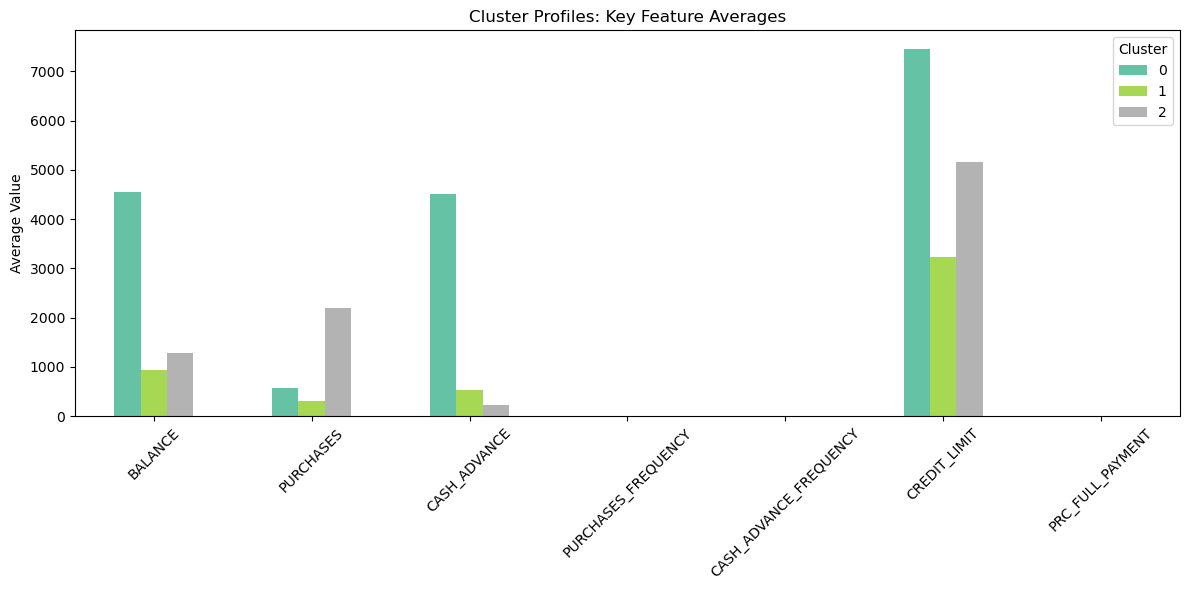

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting key features for comparison
features_to_plot = [
    'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT'
]

# Plotting bar chart
cluster_profiles[features_to_plot].T.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Cluster Profiles: Key Feature Averages")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()



2. PCA (Principal Component Analysis) Projection for Cluster Visualization (2D)

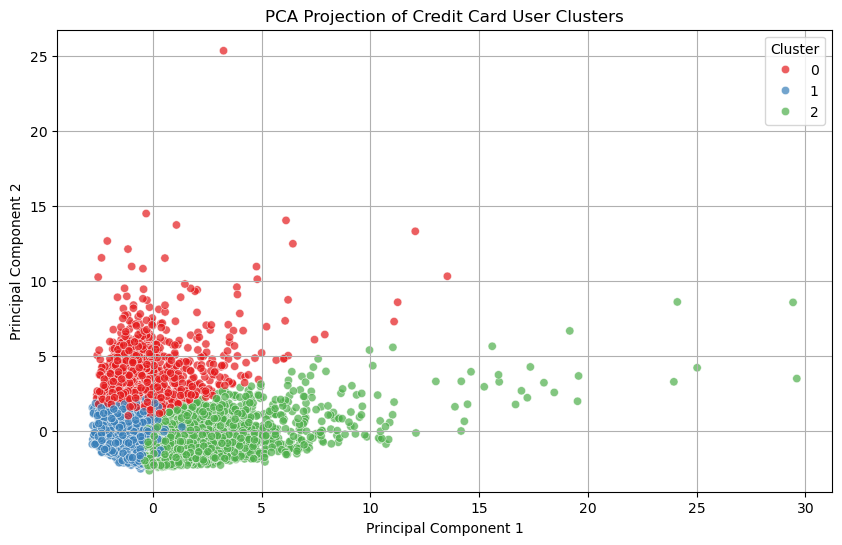

In [17]:
# PCA lets us reduce dimensions to 2 for a visual snapshot of how clusters are separated in space.

from sklearn.decomposition import PCA
import pandas as pd

from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns
df_numeric = df.drop(['Cluster'], axis=1, errors='ignore')  

# Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_clustered['Cluster']  # Use your clustered DataFrame

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title("PCA Projection of Credit Card User Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


**DELETE LATER (ONLY FOR STUDY PURPOSES)**

## ✅ **How to Assess Clustering Quality from a PCA Plot**

Your plot shows the results of **K-Means clustering with `k=3`**, projected onto 2D using **Principal Component Analysis (PCA)**. Here’s what we can observe and conclude:

---

### 🔍 **Visual Evaluation of Cluster Separation**

* **Cluster 0 (red)**: Appears **tightly packed** and relatively **well-separated** from the others along the vertical axis (PC2).
* **Cluster 1 (blue)**: Also **fairly compact** and forms a distinct group near the bottom left.
* **Cluster 2 (green)**: More **spread out** and elongated along the horizontal axis (PC1), possibly indicating a group with more **internal variance** or overlapping sub-clusters.

---

### ✅ **What’s Working Well**

* You do have **visually distinct clusters** — the three groups are identifiable.
* There's **limited overlap** between clusters 0 and 1.
* PCA components seem to capture **variance that aligns with cluster structure**, which supports the clustering.

---

### ⚠️ **What to Watch Out For**

* Cluster 2 (green) has a **wider spread**, suggesting:

  * It may include **more diverse customer behavior**.
  * K-Means may be **forcing different types** of users into one cluster.
* If Silhouette scores are low (as seen in your previous silhouette plot, around 0.2), that could indicate **weak separation** in high-dimensional space, even if 2D projection looks okay.

---

### 🔄 **Next Steps to Improve/Explore**

* ✅ **Cluster interpretation**: Use the cluster means (you already calculated) to describe each group.
* 🔄 **Try `k=4` or `k=5`**: Since cluster 2 is large and spread out, more clusters might give more insight.
* 🔍 **Use t-SNE or UMAP** for better nonlinear projection, especially if you want to detect finer substructures.

---

## 🎯 Final Verdict

You did a **solid job**, and the PCA projection **reasonably supports your clustering** — especially clusters 0 and 1. Cluster 2 is more diverse, and that could be a reason to:

* dig deeper into customer profiles within that cluster
* or try additional clustering techniques.




Cluster Profiles for k = 4


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,5010.394668,0.966663,716.017789,450.235875,265.885977,5065.974690,0.327150,0.160632,0.218675,0.508502,15.770727,10.345957,8208.653578,4173.817878,2214.536286,0.040025,11.416581
1,108.430006,0.412096,350.247868,190.521089,160.197189,299.482324,0.320591,0.072760,0.234912,0.035072,0.730330,4.812374,3632.112008,1036.853064,172.183554,0.253704,11.217888
2,1253.817942,0.974758,2182.022178,1241.768493,940.517248,234.564524,0.928413,0.390217,0.748106,0.041717,0.807569,32.727389,5121.987288,2148.583305,778.937414,0.282970,11.729314
3,1495.324927,0.966467,283.482824,210.004454,73.794186,782.285268,0.207097,0.098032,0.108717,0.157514,2.988420,3.665380,3216.349960,947.961448,805.685810,0.022886,11.482482


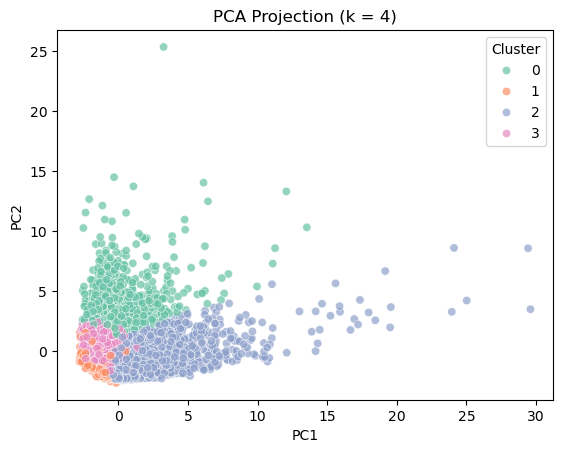


Cluster Profiles for k = 5


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,4903.428600,0.967095,553.101884,348.463283,204.741611,4983.093638,0.313999,0.153460,0.204131,0.507563,15.499493,8.604863,8062.618587,3858.809663,2071.363910,0.038158,11.413374
1,3588.990384,0.986874,7815.732886,5203.519089,2613.732785,661.788641,0.944730,0.740963,0.785823,0.071074,2.106329,90.351899,9769.620253,7409.095001,1987.582011,0.291103,11.949367
2,930.357741,0.962886,1299.705338,633.167216,666.735496,226.754889,0.897121,0.313579,0.719275,0.044345,0.828382,23.034766,4272.477078,1388.751132,645.167360,0.264987,11.610303
3,1526.118239,0.965743,255.461815,206.435714,49.375189,794.776687,0.159002,0.090819,0.067276,0.160534,3.037742,2.882179,3244.229297,958.642822,804.541051,0.022057,11.508369
4,111.260364,0.381755,335.222822,199.440295,136.001245,325.747598,0.281932,0.072926,0.198278,0.037617,0.788504,4.279293,3687.354049,1076.939244,176.594237,0.233951,11.270450


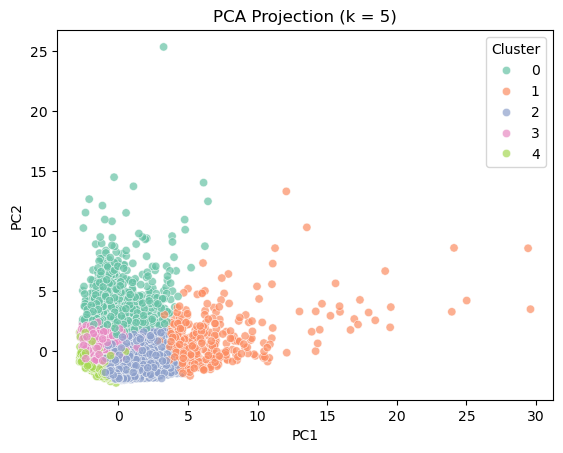

In [18]:
# Try different k values
for k in [4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_clustered['Cluster'] = kmeans.fit_predict(df_scaled)
    
    # Recalculate profiles
    cluster_profiles = df_clustered.groupby('Cluster').mean(numeric_only=True)
    
    # Visualize again
    print(f"\nCluster Profiles for k = {k}")
    display(cluster_profiles)

    # PCA Visualization
    pca_df['Cluster'] = df_clustered['Cluster']
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', alpha=0.7)
    plt.title(f'PCA Projection (k = {k})')
    plt.show()


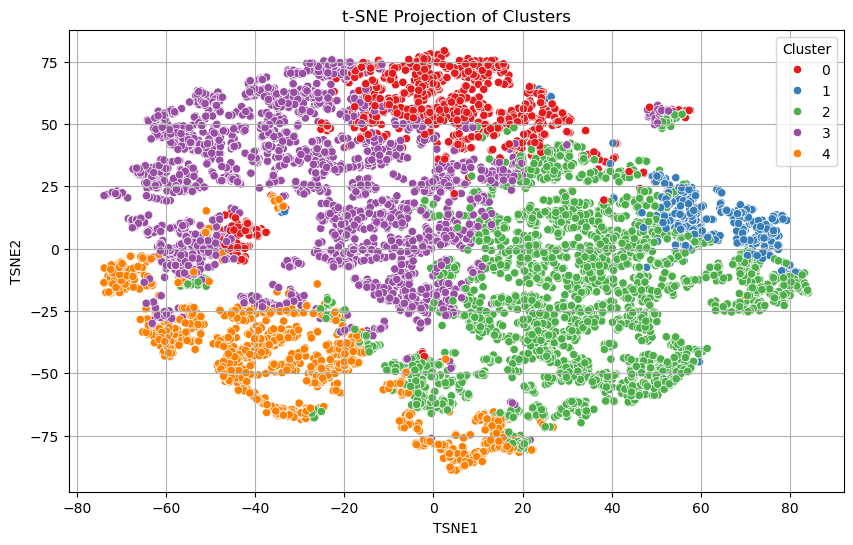

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)

tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = df_clustered['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set1')
plt.title("t-SNE Projection of Clusters")
plt.grid(True)
plt.show()


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# List of features to compare
features_to_plot = [
    'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT'
]

# Create subplots for k=3,4,5
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for idx, k in enumerate([3, 4, 5]):
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)

    # Assign clusters and compute mean profiles
    df_clustered = df.copy()
    df_clustered['Cluster'] = clusters
    cluster_profiles = df_clustered.groupby('Cluster').mean(numeric_only=True)

    # Plot on corresponding subplot
    cluster_profiles[features_to_plot].T.plot(kind='bar', ax=axes[idx], colormap='Set2')
    axes[idx].set_title(f'Cluster Profiles (k={k})')
    axes[idx].set_ylabel('Average Value')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Cluster')

# Overall layout
plt.tight_layout()
plt.suptitle("Side-by-Side Cluster Comparison (Key Features)", fontsize=16, y=1.03)
plt.show()


ModuleNotFoundError: No module named 'matplotlib'